## Evaluación N°4_MANE - MCD - Análisis de datos en Python
### Cuestionario Calificado. • 30 min. • 10 puntos en total disponibles. 10 total de puntos
Desarrollo Cuestionario • Tomás Barrientos • 23-10-2023

### Instrucciones 
- Descargar el archivo de Excel llamado “Datos.xls”  ubicado en la sección de "Bienvenida" del curso
- Leer atentamente las preguntas
- Realizar cálculos, desarrollos y análisis en base al archivo
- Las respuestas que debes seleccionar están asociadas a los códigos o resultados que obtendrás del trabajo con el archivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns

In [2]:
##Crear Dataframes de trabajo
GRD_sheet = pd.read_excel("C:/Users/Tomás Barrientos/Downloads/_Datos.xls", sheet_name = "GRD", header = 0, index_col = None)
Hosp_sheet = pd.read_excel("C:/Users/Tomás Barrientos/Downloads/_Datos.xls", sheet_name = "Hospitales", header = 0, index_col = None)
Info_sheet = pd.read_excel("C:/Users/Tomás Barrientos/Downloads/_Datos.xls", sheet_name = "Información Histórica", header = 0, index_col = None)

**Pregunta 1**

¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes con GRD9 que llegarán el día 425 al Hospital Salvador utilizando un método de media móvil sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  

In [38]:
# Filtrar los datos para pacientes con GRD9 en los últimos 5 días (días 420 a 424)
dfp1 = Info_sheet.loc[(Info_sheet['Día de llegada'] >= 420) & (Info_sheet['Día de llegada'] <= 424) & (Info_sheet['GRD'] == 'GRD9') & (Info_sheet['Nombre Establecimiento']=='Hospital Del Salvador')]
dfp1 = dfp1[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()

# Calcular la media móvil de llegadas durante los últimos 5 días (días 420 a 424)
media_movil1 = dfp1.tail(10)  # Aquí se toman las últimas 10 filas (5 días)

# Calcular la media de GRD9 durante los últimos 5 días
estimacion_pacientes3 = np.round(media_movil1['Número de llegada'].mean(), 0)

print("Estimación de pacientes GRD9 que llegarán el día 425 al Hospital Salvador:", estimacion_pacientes3)

Estimación de pacientes GRD9 que llegarán el día 425 al Hospital Salvador: 3.0


In [39]:
media_movil1

,Número de llegada
Día de llegada,
420,3
421,2
422,4


**Pregunta 2**

¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán el día 425 al Hospital Salvador utilizando un método de media móvil sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  

In [40]:
# Filtrar los datos para pacientes con GRD9 en los últimos 5 días (días 420 a 424)
dfp2 = Info_sheet.loc[(Info_sheet['Día de llegada'] >= 420) & (Info_sheet['Día de llegada'] <= 424) & (Info_sheet['Nombre Establecimiento']=='Hospital Del Salvador')]
dfp2 = dfp2[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()

# Calcular la media móvil de llegadas durante los últimos 5 días (días 420 a 424)
media_movil2 = dfp2.tail(10)  # Aquí se toman las últimas 10 filas (5 días)

# Calcular la media de GRD9 durante los últimos 5 días
estimacion_pacientes2 = np.round(media_movil2['Número de llegada'].mean(), 0)

print("Estimación de pacientes GRD9 que llegarán el día 425 al Hospital Salvador:", estimacion_pacientes2)

Estimación de pacientes GRD9 que llegarán el día 425 al Hospital Salvador: 12.0


In [41]:
media_movil2

,Número de llegada
Día de llegada,
420,14
421,12
422,18
423,9
424,6


**Pregunta 3**

¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán el día 425 a la red utilizando un método de media móvil sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?   

In [42]:
# Filtrar los datos para pacientes con GRD9 en los últimos 5 días (días 420 a 424)
dfp3 = Info_sheet.loc[(Info_sheet['Día de llegada'] >= 420) & (Info_sheet['Día de llegada'] <= 424)]
dfp3 = dfp3[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()

# Calcular la media móvil de llegadas durante los últimos 5 días (días 420 a 424)
media_movil3 = dfp3.tail(10)  # Aquí se toman las últimas 10 filas (5 días)

# Calcular la media de GRD9 durante los últimos 5 días
estimacion_pacientes3 = np.round(media_movil3['Número de llegada'].mean(), 0)

print("Estimación de pacientes GRD9 que llegarán el día 425 al Hospital Salvador:", estimacion_pacientes3)

Estimación de pacientes GRD9 que llegarán el día 425 al Hospital Salvador: 149.0


In [43]:
media_movil3

,Número de llegada
Día de llegada,
420,183
421,159
422,160
423,159
424,82


**Pregunta 4**

¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes con GRD9 que llegarán el día 425 al Hospital Salvador utilizando una regresión lineal simple sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  

In [48]:
from sklearn.linear_model import LinearRegression

In [51]:
# Filtrar los datos para pacientes con GRD9 en los últimos 5 días (días 420 a 424)
dfp4 = Info_sheet.loc[(Info_sheet['Día de llegada'] >= 420) & (Info_sheet['Día de llegada'] <= 424) & (Info_sheet['GRD'] == 'GRD9') & (Info_sheet['Nombre Establecimiento']=='Hospital Del Salvador')]
dfp4 = dfp4[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()
dfp4 = dfp4.reset_index()
dfp4.head()

,Día de llegada,Número de llegada
0,420,3
1,421,2
2,422,4


In [52]:
X = dfp4[["Día de llegada"]]
y = dfp4[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
print(f"Pendiente: {regressor.coef_[0][0]}, Intercepto: {regressor.intercept_[0]}")

Pendiente: 0.4999999999999999, Intercepto: -207.49999999999994


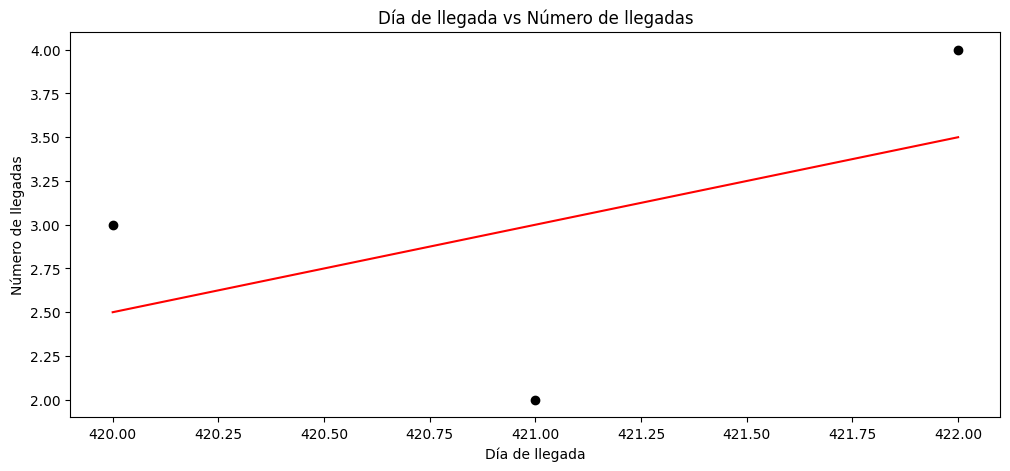

In [53]:
plt.figure(figsize=(12,5))
plt.scatter(X, y, color = 'black')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()

In [56]:
prox_llegada = 424*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 424: {np.round(prox_llegada,0)}")

Llegadas estimadas para el día 424: 4.0


**Pregunta 5**

¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán el día 425 al Hospital Salvador utilizando una regresión lineal simple sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  

In [71]:
# Datos de los últimos 5 días
dfp5 = Info_sheet.loc[(Info_sheet['Día de llegada'] >= 420) & (Info_sheet['Día de llegada'] <= 424) & (Info_sheet['Nombre Establecimiento']=='Hospital Del Salvador')]
dfp5 = dfp5[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
dfp5 = dfp5.reset_index()

# Crear el modelo de regresión lineal
X5 = dfp5[["Día de llegada"]]
y5 = dfp5[["Número de llegada"]]
regressor5 = LinearRegression().fit(X5, y5)

# Coeficientes de la regresión lineal
pendiente5 = regressor5.coef_[0][0]
intercepto5 = regressor5.intercept_[0]

# Día que deseas predecir
dia_a_predecir5 = 425

# Realiza la predicción
prediccion5 = pendiente5 * dia_a_predecir5 + intercepto5

# Redondea al entero superior
prediccion_redondeada5 = int(prediccion5 + 0.5)

# Imprime la estimación
print(f"Estimación de pacientes para el día {dia_a_predecir5}: {prediccion_redondeada5} pacientes")

Estimación de pacientes para el día 425: 6 pacientes


In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(X6, y6, color = 'black')
plt.plot(X6, regressor6.predict(X6), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()

**Pregunta 6**

¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán a la red el día 425 utilizando una regresión lineal simple sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  

In [70]:
# Datos de los últimos 5 días
dfp6 = Info_sheet.loc[(Info_sheet['Día de llegada'] >= 420) & (Info_sheet['Día de llegada'] <= 424)]
dfp6 = dfp6[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
dfp6 = dfp6.reset_index()

# Crear el modelo de regresión lineal
X6 = dfp6[["Día de llegada"]]
y6 = dfp6[["Número de llegada"]]
regressor6 = LinearRegression().fit(X6, y6)

# Coeficientes de la regresión lineal
pendiente = regressor6.coef_[0][0]
intercepto = regressor6.intercept_[0]

# Día que deseas predecir
dia_a_predecir = 425

# Realiza la predicción
prediccion = pendiente * dia_a_predecir + intercepto

# Redondea al entero superior
prediccion_redondeada = int(prediccion + 0.5)

# Imprime la estimación
print(f"Estimación de pacientes para el día {dia_a_predecir}: {prediccion_redondeada} pacientes")


Estimación de pacientes para el día 425: 88 pacientes


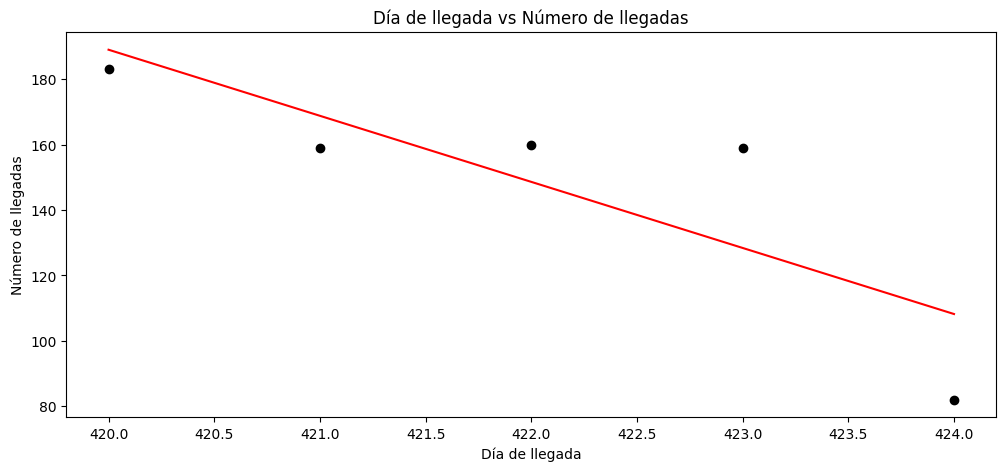

In [69]:
plt.figure(figsize=(12,5))
plt.scatter(X6, y6, color = 'black')
plt.plot(X6, regressor6.predict(X6), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()